In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Lendo o Excel
df = pd.ExcelFile('Prova ADV.xlsx')

# Lendo as planilhas
base2= pd.read_excel(df, 'BASE - Pergunta 2')


## Analise Exploratória

In [3]:
base2.F_RECOMPROU.value_counts()

0    11494
1    10279
Name: F_RECOMPROU, dtype: int64

In [4]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente_hash         21773 non-null  int64  
 1   QTD_PED_6M              7039 non-null   float64
 2   QTD_PED_3M              7039 non-null   float64
 3   QTD_PED_1M              7039 non-null   float64
 4   APP_6M                  7039 non-null   float64
 5   MARKETPLACE_6M          7039 non-null   float64
 6   TOP3_DEPTOS_6M          7039 non-null   float64
 7   TIPO_PAG_MAIS_USADO_6M  7039 non-null   object 
 8   C_CUPOM                 21773 non-null  int64  
 9   C_APP                   21773 non-null  int64  
 10  C_TIPO_PAGAMENTO        21773 non-null  object 
 11  C_MARKETPLACE           21773 non-null  int64  
 12  C_DEPTO                 21773 non-null  object 
 13  F_RECOMPROU             21773 non-null  int64  
dtypes: float64(6), int64(5), object(3)
mem

In [5]:
base2.groupby('F_RECOMPROU').mean()

,id_cliente_hash,QTD_PED_6M,QTD_PED_3M,QTD_PED_1M,APP_6M,MARKETPLACE_6M,TOP3_DEPTOS_6M,C_CUPOM,C_APP,C_MARKETPLACE
F_RECOMPROU,,,,,,,,,,
0,2.794402e+16,1.635494,0.928799,0.385228,0.038789,0.116897,0.217853,0.045937,0.020445,0.140334
1,-2.333344e+16,2.992050,1.609463,0.638356,0.063021,0.182470,0.251115,0.055842,0.034147,0.132892


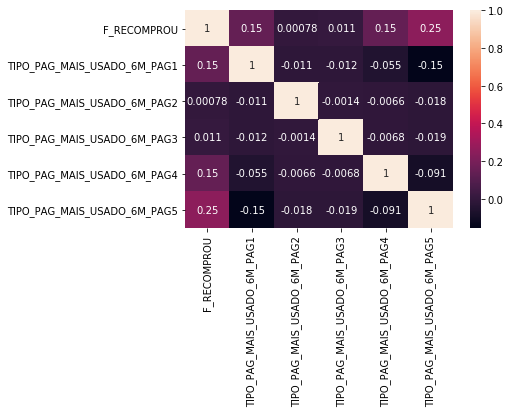

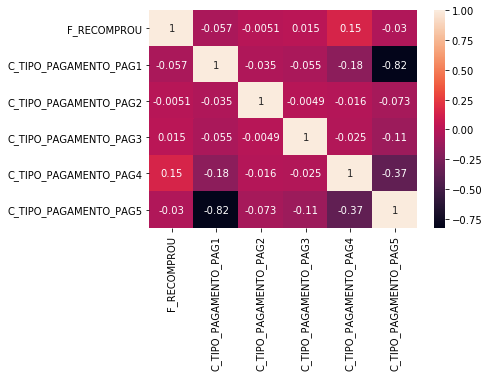

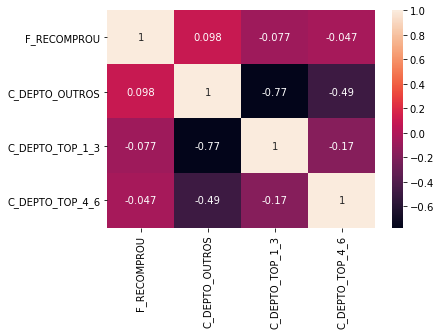

In [6]:
col_obj = ['TIPO_PAG_MAIS_USADO_6M','C_TIPO_PAGAMENTO','C_DEPTO']

for i,col in enumerate(col_obj):
    plt.figure(i)
    df2 = pd.get_dummies(base2[[col,'F_RECOMPROU']])
    sns.heatmap(df2.corr(),annot=True)

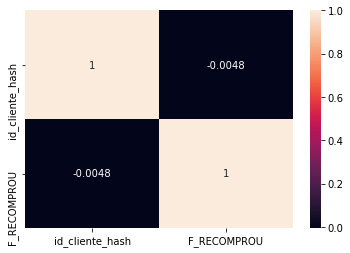

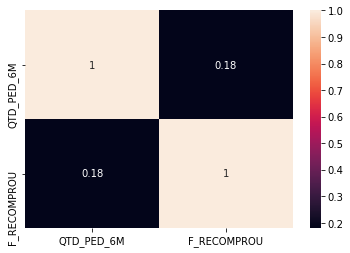

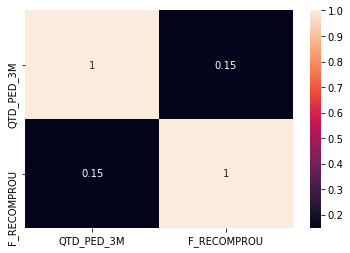

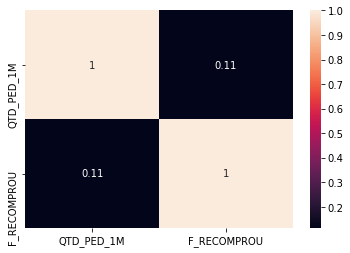

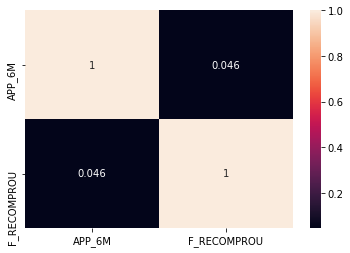

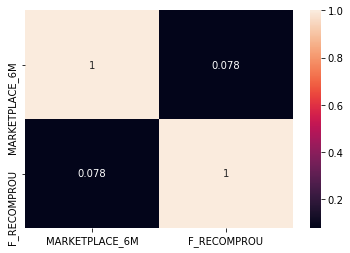

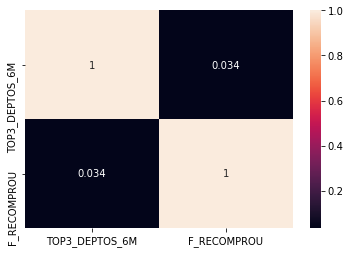

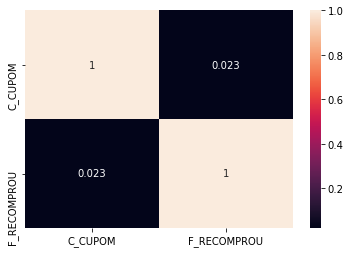

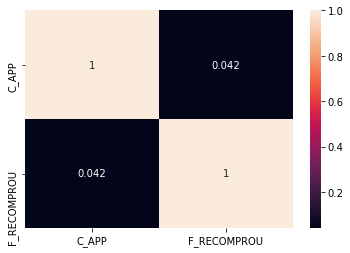

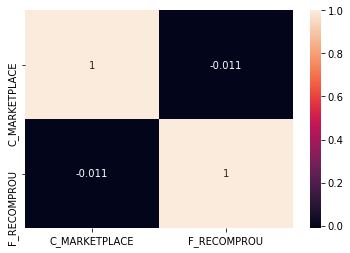

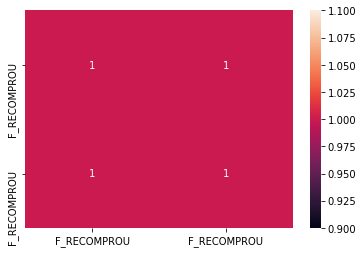

In [7]:
col_num = base2.select_dtypes(np.number).columns

for i,col in enumerate(col_num):
    plt.figure(i)
    df2 = base2[[col,'F_RECOMPROU']]
    sns.heatmap(df2.corr(),annot=True)

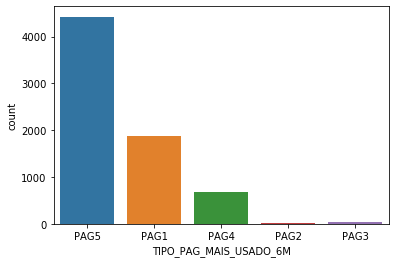

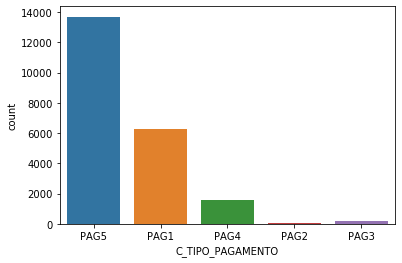

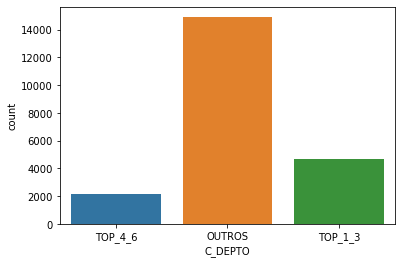

In [8]:
for i, col in enumerate(base2.select_dtypes(object).columns):
    plt.figure(i)
    sns.countplot(x=col, data=base2)

id_cliente_hash


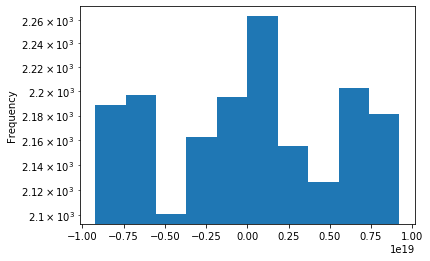

QTD_PED_6M


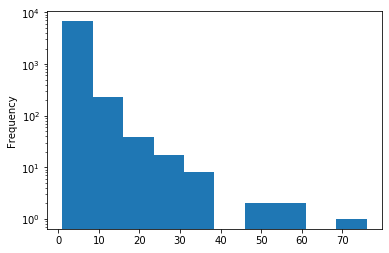

QTD_PED_3M


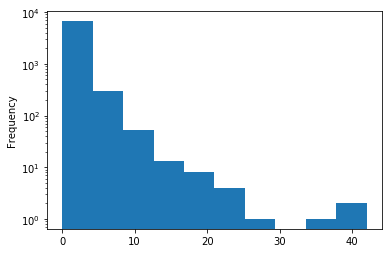

QTD_PED_1M


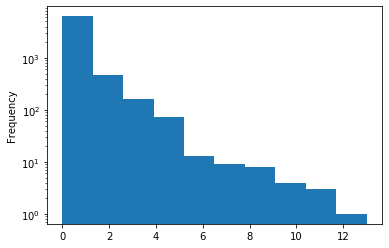

APP_6M


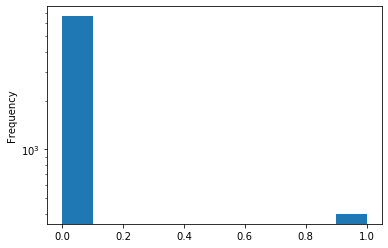

MARKETPLACE_6M


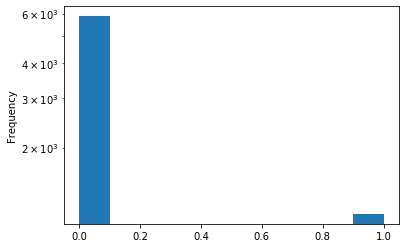

TOP3_DEPTOS_6M


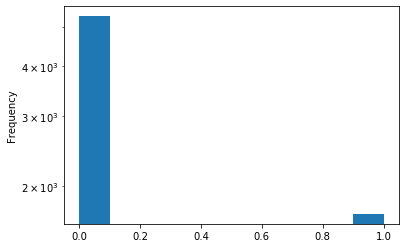

C_CUPOM


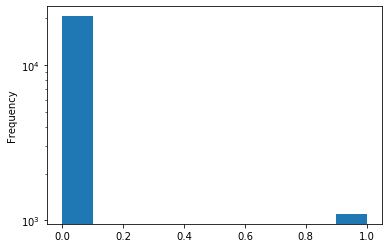

C_APP


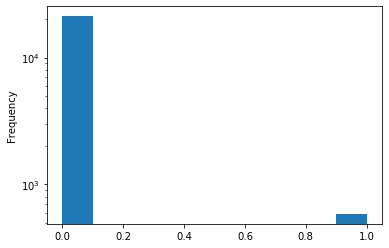

C_MARKETPLACE


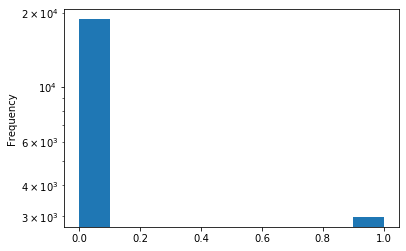

F_RECOMPROU


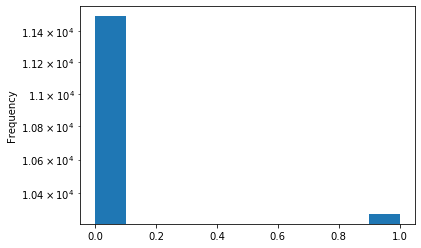

In [9]:
# Analise univariavel
for coluna in col_num:
    print(coluna)
    base2[coluna].plot.hist(bins = 10, log= True)
    plt.show()

In [10]:
base2.isna().sum()

id_cliente_hash               0
QTD_PED_6M                14734
QTD_PED_3M                14734
QTD_PED_1M                14734
APP_6M                    14734
MARKETPLACE_6M            14734
TOP3_DEPTOS_6M            14734
TIPO_PAG_MAIS_USADO_6M    14734
C_CUPOM                       0
C_APP                         0
C_TIPO_PAGAMENTO              0
C_MARKETPLACE                 0
C_DEPTO                       0
F_RECOMPROU                   0
dtype: int64

## Tratamento

In [11]:
#tornando o id indice da base
base2.set_index("id_cliente_hash", inplace = True)

In [12]:
#criando a classe sem pagamento
base2.TIPO_PAG_MAIS_USADO_6M.fillna("SEM_PAG", inplace=True)

In [13]:
#preenchendo com zero os valores missing
base2.fillna(0, inplace=True)

In [14]:
#tornando as variaveis dummies 
df_dummies = pd.get_dummies(base2, drop_first=True)

In [15]:
#Verificando a média de cada variável
df_dummies.groupby('F_RECOMPROU').mean()

,QTD_PED_6M,QTD_PED_3M,QTD_PED_1M,APP_6M,MARKETPLACE_6M,TOP3_DEPTOS_6M,C_CUPOM,C_APP,C_MARKETPLACE,TIPO_PAG_MAIS_USADO_6M_PAG2,TIPO_PAG_MAIS_USADO_6M_PAG3,TIPO_PAG_MAIS_USADO_6M_PAG4,TIPO_PAG_MAIS_USADO_6M_PAG5,TIPO_PAG_MAIS_USADO_6M_SEM_PAG,C_TIPO_PAGAMENTO_PAG2,C_TIPO_PAGAMENTO_PAG3,C_TIPO_PAGAMENTO_PAG4,C_TIPO_PAGAMENTO_PAG5,C_DEPTO_TOP_1_3,C_DEPTO_TOP_4_6
F_RECOMPROU,,,,,,,,,,,,,,,,,,,,
0,0.267792,0.152079,0.063076,0.006351,0.019140,0.035671,0.045937,0.020445,0.140334,0.001305,0.001044,0.007569,0.106838,0.836262,0.003393,0.006351,0.036976,0.642074,0.245780,0.111623
1,1.501119,0.807472,0.320265,0.031618,0.091546,0.125985,0.055842,0.034147,0.132892,0.001362,0.001848,0.058566,0.310731,0.498297,0.002821,0.008950,0.115284,0.613387,0.182703,0.083860


In [16]:
#Separando o target
X = df_dummies.drop(["F_RECOMPROU"], axis = 1)
y = df_dummies[["F_RECOMPROU"]]

In [17]:
#Aplicando a regressão logística para seleção das features
logit_model = sm.Logit(y, X)

result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.606816
         Iterations 7
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.123     
Dependent Variable:       F_RECOMPROU          AIC:                  26464.4270
Date:                     2020-10-12 15:48     BIC:                  26624.1955
No. Observations:         21773                Log-Likelihood:       -13212.   
Df Model:                 19                   LL-Null:              -15058.   
Df Residuals:             21753                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

#### Escolhemos as variáveis que possuem um p-valor abaixo de 0,05, podemos observar esses valores na coluna P>|z|

In [18]:
#Variéveis com p-valor abaixo de 0,05
cols = ['QTD_PED_6M', 'C_MARKETPLACE',
       'TIPO_PAG_MAIS_USADO_6M_SEM_PAG', 'C_TIPO_PAGAMENTO_PAG4',
        'C_TIPO_PAGAMENTO_PAG5', 'C_DEPTO_TOP_1_3', 'C_DEPTO_TOP_4_6']

In [22]:
#Normalizando as variáveis
sc = StandardScaler()
x = sc.fit_transform(X[cols])

#Aplicando novamente o modelo
logit_model = sm.Logit(y,x )

result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.607162
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.122     
Dependent Variable: F_RECOMPROU      AIC:              26453.4951
Date:               2020-10-12 15:49 BIC:              26509.4141
No. Observations:   21773            Log-Likelihood:   -13220.   
Df Model:           6                LL-Null:          -15058.   
Df Residuals:       21766            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1        0.8483     0.0476    17.8049   0.0000    0.7549    0.9416
x2       -0.0707     0.0150    -4.7124   0.0000   -0.1001 

#### Não há mais variáveis com p-valor maior que 0,05

No proximo passo verificamos o coeficiente de relação das variáveis com o nosso target, nesse caso o coeficiente está em porcentagem

In [23]:
(np.exp(result.params[0:]) - 1) * 100

x1    133.558469
x2     -6.826497
x3    -31.405627
x4     27.484736
x5      5.652691
x6     -9.904683
x7     -8.559371
dtype: float64

Refazendo o modelo utilizando scikit-learn para maior facilidade de obter as métricas de ajuste.

In [24]:
logreg = LogisticRegression(penalty='none', solver='newton-cg')
logreg.fit(x, y["F_RECOMPROU"])

y_pred = logreg.predict(x)
y_pred_ba = logreg.predict_proba(x)

In [25]:
#Acurracia
accuracy_score(y, y_pred)

0.6827722408487576

In [26]:
#Matriz de confusão
confusion_matrix(y, y_pred)

array([[9368, 2126],
       [4781, 5498]], dtype=int64)

In [27]:
# Report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73     11494
           1       0.72      0.53      0.61     10279

    accuracy                           0.68     21773
   macro avg       0.69      0.67      0.67     21773
weighted avg       0.69      0.68      0.68     21773



In [28]:
# Concatenando a base inicial as probabilidades 

cop = base2.copy()

cop["y_pred_ba_1"] = y_pred_ba[:,1]


cop.sort_values(by='y_pred_ba_1', ascending=False, inplace=True)
cop.head(20)

,QTD_PED_6M,QTD_PED_3M,QTD_PED_1M,APP_6M,MARKETPLACE_6M,TOP3_DEPTOS_6M,TIPO_PAG_MAIS_USADO_6M,C_CUPOM,C_APP,C_TIPO_PAGAMENTO,C_MARKETPLACE,C_DEPTO,F_RECOMPROU,y_pred_ba_1
id_cliente_hash,,,,,,,,,,,,,,
-3609656434247235584,76.0,41.0,11.0,0.0,1.0,1.0,PAG4,0,0,PAG5,0,OUTROS,1,1.000000
3354916191574227968,58.0,36.0,7.0,1.0,1.0,1.0,PAG5,0,0,PAG5,0,OUTROS,1,1.000000
851552889074963712,57.0,22.0,2.0,0.0,0.0,0.0,PAG5,1,0,PAG1,0,OUTROS,1,1.000000
3496286313122908672,51.0,17.0,6.0,1.0,1.0,0.0,PAG4,0,0,PAG4,0,OUTROS,1,1.000000
1818325763590545152,48.0,42.0,3.0,0.0,0.0,0.0,PAG4,0,0,PAG5,1,TOP_4_6,1,1.000000
-8092636465296791552,33.0,12.0,4.0,0.0,1.0,1.0,PAG4,0,0,PAG4,0,OUTROS,1,0.999998
-5402314776576272384,35.0,15.0,9.0,1.0,0.0,0.0,PAG1,0,1,PAG5,0,OUTROS,1,0.999997
-2578065025606757376,33.0,18.0,2.0,1.0,1.0,1.0,PAG4,0,0,PAG4,1,OUTROS,1,0.999997
3439920740158851072,32.0,17.0,8.0,0.0,1.0,1.0,PAG4,0,0,PAG4,0,OUTROS,1,0.999997


In [30]:
# Base com as probabilidades
cop.to_csv('base_prob.csv')  